# Download and Slice Samples
This notebook outline how downloading the file from XenoCanto works, and how the distribution changes after splitting into 5 second windows

In [1]:
import librosa
librosa.__version__

'0.8.0'

# 1. Download Samples
Download recordings from XenoCanto.
- Appropriately splits call/song for species, specified in BIRDLIST in download-from-metadata.py
- You can change the birds to be downloaded by changing BIRDLIST

In [14]:
import sys
sys.path.append('src/birdsong')
import numpy as np
import pandas as pd

In [21]:
RAW_DOWNLOADS_DIR = '../meta_test'
METADATA_PATH = 'test.json'

In [22]:
%run src/download_from_metadata.py $METADATA_PATH $RAW_DOWNLOADS_DIR

download_from_metadata.py(18989): 2021-04-07 10:56:00,062;INFO: Note: if dowloads requested, will overwrite any existing recordings.


ERROR: Please check that the birds in metadata are the same as those in BIRDLIST
Birds in metadata: ['Tangaragyrola'].
Birds in BIRDLIST: ['Corapipoaltera', 'Tangaragyrola'].


# 2. Data Exploration of Downloaded samples

In [16]:
# Show Distribution of Samples by Class
# sys.path.append('data_augmentation/src')
from data_augmentation.src.utils import sample_compositions_by_species

<AxesSubplot:title={'center':'By Sample'}>

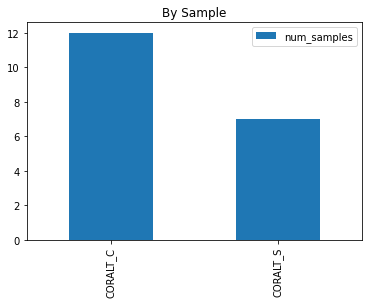

In [6]:
raw_species_by_samples_df = sample_compositions_by_species(RAW_DOWNLOADS_DIR, augmented=False)
raw_species_by_samples_df.plot.bar(title='By Sample')

In [7]:
# Median, Min, Max by samples
def print_median_min_max(df):
    df_np = df.values.flatten()
    index_max, index_min = df.idxmax().to_numpy()[0], df.idxmin().to_numpy()[0]

    val_max = np.max(df_np)
    max_tenth = val_max//10 +1
    val_median = np.median(df_np)

    print(f"Median: {val_median},  Min: {np.min(df_np)} ({index_min}) ,  Max: {val_max} ({index_max})")
    print(f"10% of max is {max_tenth}")
    
# Print the median, min, max by samples and by recording lengths
print("By samples:")
print_median_min_max(raw_species_by_samples_df)

By samples:
Median: 9.5,  Min: 7 (CORALT_S) ,  Max: 12 (CORALT_C)
10% of max is 2


In [8]:
# 3. Use sliding window to split audio into 5 second segments

In [9]:
# Supress all warnings (mostly cannot use Pysound...)
import warnings
warnings.simplefilter("ignore")

In [11]:
%run sliding-window.py $RAW_DOWNLOADS_DIR {RAW_DOWNLOADS_DIR}_segmented

../meta_test_segmented already exists. Do you want to rewrite ../meta_test_segmented? [y/N]  y
../meta_test_segmented/spectrograms/ already exists. Do you want to rewrite ../meta_test_segmented/spectrograms/? [y/N]  y
../meta_test_segmented/wav-files/ already exists. Do you want to rewrite ../meta_test_segmented/wav-files/? [y/N]  y
../meta_test_segmented/spectrograms/CORALT_S already exists. Do you want to rewrite ../meta_test_segmented/spectrograms/CORALT_S? [y/N]  y
../meta_test_segmented/wav-files/CORALT_S already exists. Do you want to rewrite ../meta_test_segmented/wav-files/CORALT_S? [y/N]  y


In [18]:
SEGMENTED_WAV_DIR = '../meta_test_segmented/wav-files'

<AxesSubplot:title={'center':'By Sample'}>

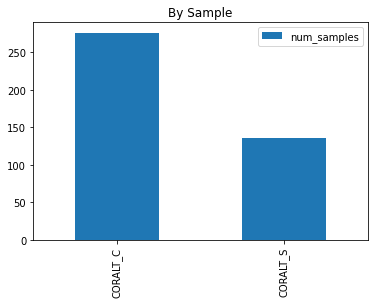

In [19]:
segmented_species_by_samples_df = sample_compositions_by_species(SEGMENTED_WAV_DIR, augmented=False)
segmented_species_by_samples_df.plot.bar(title='By Sample')

In [20]:
# Print the median, min, max by samples and by recording lengths
print("By samples:")
print_median_min_max(segmented_species_by_samples_df)

By samples:
Median: 206.0,  Min: 136 (CORALT_S) ,  Max: 276 (CORALT_C)
10% of max is 28
